# Capstone Project (Week 2)

##### By Rhys Davies (August 2019)
--------------------------------------------------------------------------------------

### Initialization

In [7]:
# Import libraries
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import statistics # library for statistics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# Matplotlib and associated plotting modules
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

import matplotlib.cm as cm
import matplotlib.colors as colors

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

#!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

Matplotlib version:  3.0.2
Libraries imported.


### Foursquare Data

In [8]:
# Define Foursquare credentials
CLIENT_ID = 'OT5JIOBYL0WNG1J5SUK23PSX2UQZCHS5WOXIAFNJSTF41CN5' # your Foursquare ID
CLIENT_SECRET = 'XIZLBTLOTSJRIPEHY5JGC03IARNVI00X1BPAMLP5NB0FYOYX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1000
print('Rhys Davies:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Rhys Davies:
CLIENT_ID: OT5JIOBYL0WNG1J5SUK23PSX2UQZCHS5WOXIAFNJSTF41CN5
CLIENT_SECRET:XIZLBTLOTSJRIPEHY5JGC03IARNVI00X1BPAMLP5NB0FYOYX


In [9]:
# Foursquare search construction of URL
latitude = 51.50795322377849
longitude = -0.12432828429154276

search_query = '%vegan%'
radius = 5000

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, 
    latitude, longitude, 
    VERSION, 
    search_query, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/search?client_id=OT5JIOBYL0WNG1J5SUK23PSX2UQZCHS5WOXIAFNJSTF41CN5&client_secret=XIZLBTLOTSJRIPEHY5JGC03IARNVI00X1BPAMLP5NB0FYOYX&ll=51.50795322377849,-0.12432828429154276&v=20180604&query=%vegan%&radius=5000&limit=1000'

In [10]:
# Define Abbreviation

def firstN(s, n=3):
    return s[:n]

In [11]:
# Run Foursquare search
results = requests.get(url).json()

name_col = []
postcode_col = []
ModPC_col = []
lat_col = []
lng_col = []

for i in range(0, len(results['response']['venues'])):
    name_col.append(results['response']['venues'][i]['name'])
    
    try: postcode_col.append(results['response']['venues'][i]['location']['postalCode'].replace(" ", ""))
    except KeyError:postcode_col.append('')

    ModPC_col.append(firstN(postcode_col[i])) 

    lat_col.append(results['response']['venues'][i]['location']['lat'])
    lng_col.append(results['response']['venues'][i]['location']['lng'])     
    
df_Foursquare_Raw = pd.DataFrame({'FoursquareName' : name_col, 'PostalCode' : postcode_col, 'ShortPostalCode' : ModPC_col, 'Latitude' : lat_col, 'Longitude' : lng_col})

print('Check Foursquare datatype : ', df_Foursquare_Raw.dtypes)

Check Foursquare datatype :  FoursquareName      object
PostalCode          object
ShortPostalCode     object
Latitude           float64
Longitude          float64
dtype: object


In [12]:
# Clean NaN and show data table

df_Foursquare_NaN = df_Foursquare_Raw.replace('', np.nan, inplace=False)
df_Foursquare = df_Foursquare_NaN.dropna(axis=0, inplace=False).reset_index(drop=True)

df_Foursquare.head(50)

,FoursquareName,PostalCode,ShortPostalCode,Latitude,Longitude
0,Vegan Yes,E16QL,E16,51.518734,-0.071483
1,Vegan Burgers by Mooshies,E16RL,E16,51.519731,-0.071783
2,Korean BBQ & Vegan Restaurant,E14TP,E14,51.519983,-0.056017
3,Soho Vegan Market,W1D7PP,W1D,51.512285,-0.133766
4,Vegan Crosstown Doughnuts,W1U1BW,W1U,51.515354,-0.151135
5,The Little Vegan Pop Up Shop by Superdrug,E16GY,E16,51.523694,-0.076749
6,Astro Vegan,EC1N,EC1,51.519875,-0.109297
7,Vegan Nights London,E1,E1,51.521603,-0.071401
8,Essential Vegan,E27JP,E27,51.526287,-0.077451
9,Vegan No Blood No Bones,E16GY,E16,51.523546,-0.076607


In [13]:
# Checking postcode
# Reference: https://pypi.org/project/uk-postcode-utils/

#!/usr/bin/env python
#from ukpostcodeutils import validation
#if validation.is_valid_postcode('E1 6RL'):
#    print("Postcode OK.")    

### Import Government House Price Data

In [14]:
# Import UK Government data
# Ref source: https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads

houseprice_url = 'http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2018.csv'

df_houseprice_raw =pd.read_csv(houseprice_url, names=['ID', 'PricePaid', 'Date', 'PostalCode', 'D', 'N', 'F', 'Address1', 'Address2', 'Address3', 'Town', 'City', 'County1', 'County2', 'Code1', 'Code2'])
print('Show df_houseprice_raw.shape :', df_houseprice_raw.shape)
print('Raw houseprice data shown below :')

df_houseprice_raw.head()

Show df_houseprice_raw.shape : (1021215, 16)
Raw houseprice data shown below :


,ID,PricePaid,Date,PostalCode,D,N,F,Address1,Address2,Address3,Town,City,County1,County2,Code1,Code2
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25 00:00,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23 00:00,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19 00:00,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22 00:00,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19 00:00,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A


In [15]:
# Build new condensed dataframe
df_houseprice_filtered =  df_houseprice_raw.filter(['PricePaid', 'PostalCode'], axis=1)

print('Check new dataframe below :')
df_houseprice_filtered.head()

Check new dataframe below :


,PricePaid,PostalCode
0,405000,WR15 8LH
1,315000,SY7 8QA
2,165000,SY1 2BF
3,370000,SY8 4DF
4,320000,TF10 7ET


In [16]:
# Check how many NaN

# Check total number of rows
print('Total rows :', len(df_houseprice_filtered))
print('')

# Count NaN
print('Show NaN row count :')
print(df_houseprice_filtered.count(axis = 0))

print('')
print('Rows to delete :', df_houseprice_filtered.count(axis = 0)[0] - df_houseprice_filtered.count(axis = 0)[1])

Total rows : 1021215

Show NaN row count :
PricePaid     1021215
PostalCode    1015297
dtype: int64

Rows to delete : 5918


In [17]:
# Drop rows with NaN
df_houseprice_filtered_cleaned = df_houseprice_filtered.dropna() 

# Check number of rows
print('Number of rows after dropping NaN : ', len(df_houseprice_filtered_cleaned))

Number of rows after dropping NaN :  1015297


In [18]:
# Build new ShortPostalCodeArray

ShortPostalCodeArray = []

for i in range(0, len(df_houseprice_filtered_cleaned['PostalCode'])):
    try: ShortPostalCodeArray.append(firstN(df_houseprice_filtered_cleaned['PostalCode'][i].replace(" ", "")))
    except KeyError:ShortPostalCodeArray.append('')
        
ShortPostalCodeArray[0:5]

['WR1', 'SY7', 'SY1', 'SY8', 'TF1']

In [19]:
# Show array
df_houseprice_filtered_cleaned.insert(df_houseprice_filtered_cleaned.ndim, "ShortPostalCode", ShortPostalCodeArray, True)
df_houseprice = df_houseprice_filtered_cleaned.drop(['PostalCode'], axis=1)
df_houseprice.head()
#df_houseprice_filtered_cleaned.head()

,PricePaid,ShortPostalCode
0,405000,WR1
1,315000,SY7
2,165000,SY1
3,370000,SY8
4,320000,TF1


In [20]:
#Check for blanks
df_houseprice['ShortPostalCode'].replace('', np.nan, inplace=True)
df_houseprice.dropna(subset=['ShortPostalCode'], inplace=True)

# Calculate average price by ShortPostalCode
df_average_houseprice = df_houseprice.groupby(['ShortPostalCode']).mean()

print('Shape of df_average_houseprice : ', df_average_houseprice.shape)
df_average_houseprice.head()

Shape of df_average_houseprice :  (1256, 1)


,PricePaid
ShortPostalCode,
AL1,346173.156863
AL2,306666.916905
AL3,408839.506977
AL4,322660.313889
AL5,313967.448544


### Combine Data Sets

In [21]:
# Check the main tables to be used:
print('Check House Price Data :\r\n', df_houseprice_filtered_cleaned.head(3))
print('')
print('Check Foursquare :\r\n',  df_Foursquare.head(3))

Check House Price Data :
    PricePaid PostalCode ShortPostalCode
0     405000   WR15 8LH             WR1
1     315000    SY7 8QA             SY7
2     165000    SY1 2BF             SY1

Check Foursquare :
                   FoursquareName PostalCode ShortPostalCode   Latitude  \
0                      Vegan Yes      E16QL             E16  51.518734   
1      Vegan Burgers by Mooshies      E16RL             E16  51.519731   
2  Korean BBQ & Vegan Restaurant      E14TP             E14  51.519983   

   Longitude  
0  -0.071483  
1  -0.071783  
2  -0.056017  


In [22]:
# Merge data into a single data frame
df_combined = pd.merge(df_average_houseprice, df_Foursquare, on='ShortPostalCode', how='inner')
df_combined.set_index('ShortPostalCode',inplace=True)

print('Number of restaurants included : ', len(df_combined))
print('')
df_combined.head(50)

Number of restaurants included :  25



,PricePaid,FoursquareName,PostalCode,Latitude,Longitude
ShortPostalCode,,,,,
E14,405031.762481,Korean BBQ & Vegan Restaurant,E14TP,51.519983,-0.056017
E16,368626.553760,Vegan Yes,E16QL,51.518734,-0.071483
E16,368626.553760,Vegan Burgers by Mooshies,E16RL,51.519731,-0.071783
E16,368626.553760,The Little Vegan Pop Up Shop by Superdrug,E16GY,51.523694,-0.076749
E16,368626.553760,Vegan No Blood No Bones,E16GY,51.523546,-0.076607
E16,368626.553760,House Of Vegan,E16RU,51.521744,-0.071561
E16,368626.553760,Vida Vegan Bakery,E16SB,51.523909,-0.071618
E16,368626.553760,Shakey Shakey Vegan,E16RU,51.521777,-0.071564
E16,368626.553760,Jakes Vegan Steaks,E16RU,51.521821,-0.071393


In [23]:
# Group restaurants by ShortPostalCode
df_grouped_spc = df_combined.groupby("ShortPostalCode")["FoursquareName"].apply(lambda tags: ', '.join(tags))
df_grouped_spc.head()

ShortPostalCode
E14                        Korean BBQ & Vegan Restaurant
E16    Vegan Yes, Vegan Burgers by Mooshies, The Litt...
E27                                      Essential Vegan
E82                              All Nations Vegan House
EC1                                          Astro Vegan
Name: FoursquareName, dtype: object

In [24]:
# Create new dataframe to count number of restaurants in each ShortPostalCode
df_count = df_combined.reset_index()

In [25]:
# Make a new dataframe

spc_col = []
listnames_col = []
averageprice_col = []
restaurants_col = []
numberrestaurants_col = []

for j in range(0, len(df_grouped_spc)):
    spc_col.append(df_grouped_spc.index[j])
    averageprice_col.append(df_average_houseprice.loc[df_grouped_spc.index[j], 'PricePaid'])
    restaurants_col.append(df_grouped_spc[df_grouped_spc.index[j]])                
    numberrestaurants_col.append(list(df_count['ShortPostalCode']).count(df_grouped_spc.index[j]))
        
df_namesprices = pd.DataFrame({'SPC' : spc_col, 'Restaurants' : restaurants_col, 'NumberRestaurants' : numberrestaurants_col, 'AveragePrice' : averageprice_col})

# Check number of restaruants
print('Check number of restaurants included : ', sum(df_namesprices['NumberRestaurants']))
print('')
df_namesprices.head(50)

Check number of restaurants included :  25



,SPC,Restaurants,NumberRestaurants,AveragePrice
0,E14,Korean BBQ & Vegan Restaurant,1,405031.762481
1,E16,"Vegan Yes, Vegan Burgers by Mooshies, The Litt...",10,368626.553760
2,E27,Essential Vegan,1,308491.561798
3,E82,All Nations Vegan House,1,398561.193878
4,EC1,Astro Vegan,1,349628.757812
5,N16,"Vegan Veggie Love Cafe, Vegan Tea Room",2,345502.101721
6,N19,Vx [vee]{cross},1,354045.204741
7,N78,Keren View Vegan Restaurant,1,672445.413793
8,NW1,"Rudy's Dirty Vegan Diner, Young Vegans",2,483962.479726
9,SE1,"Y Vegan, London Vegetarian and Vegan School",2,328674.087105


### Visualization - Centre of Gravity

In [26]:
# Review of Foursquare data
df_Foursquare.head()

,FoursquareName,PostalCode,ShortPostalCode,Latitude,Longitude
0,Vegan Yes,E16QL,E16,51.518734,-0.071483
1,Vegan Burgers by Mooshies,E16RL,E16,51.519731,-0.071783
2,Korean BBQ & Vegan Restaurant,E14TP,E14,51.519983,-0.056017
3,Soho Vegan Market,W1D7PP,W1D,51.512285,-0.133766
4,Vegan Crosstown Doughnuts,W1U1BW,W1U,51.515354,-0.151135


In [27]:
# Find 'centre of gravity of restaurants'
CentralLat = statistics.mean(df_Foursquare['Latitude'])
CentralLng = statistics.mean(df_Foursquare['Longitude'])

print('Centre of gravity is : ', CentralLat, ' , ', CentralLng)

Centre of gravity is :  51.52451238361779  ,  -0.09280473674852939


In [28]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=12.2)

# add markers to map
for name, lat, lng in zip(df_Foursquare['FoursquareName'], df_Foursquare['Latitude'], df_Foursquare['Longitude']):
    label = '{} : ({}, {})'.format(name, lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup= label, 
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)   
    label_cog = folium.Popup(name, parse_html=True)
    label_cog = '{} : ({}, {})'.format('C_o_G', CentralLat, CentralLng)
    folium.CircleMarker(
        [CentralLat, CentralLng],
        radius=5,
        popup= label_cog, 
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  

print('Map Showing Vegan Restaurants and the Centre of Gravity :')
map_london

Map Showing Vegan Restaurants and the Centre of Gravity :


### Visualization - Scatter Graph of Number of Restaurants and Average House Price

In [29]:
# Review dataframe
df_number_price = pd.concat([df_namesprices['NumberRestaurants'], df_namesprices['AveragePrice']], axis=1)
df_number_price.head(30)

,NumberRestaurants,AveragePrice
0,1,405031.762481
1,10,368626.553760
2,1,308491.561798
3,1,398561.193878
4,1,349628.757812
5,2,345502.101721
6,1,354045.204741
7,1,672445.413793
8,2,483962.479726
9,2,328674.087105


In [30]:
# Review dataframe with ShortPostalCode
df_number_price_spc = pd.concat([df_namesprices['SPC'], df_namesprices['NumberRestaurants'], df_namesprices['AveragePrice']], axis=1)
df_number_price_spc.head(30)

,SPC,NumberRestaurants,AveragePrice
0,E14,1,405031.762481
1,E16,10,368626.553760
2,E27,1,308491.561798
3,E82,1,398561.193878
4,EC1,1,349628.757812
5,N16,2,345502.101721
6,N19,1,354045.204741
7,N78,1,672445.413793
8,NW1,2,483962.479726
9,SE1,2,328674.087105


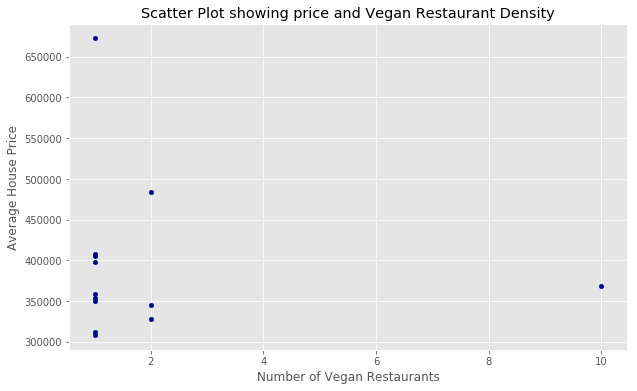

In [31]:
# Plot graph
df_number_price.plot(kind='scatter', x='NumberRestaurants', y='AveragePrice', figsize=(10, 6), color='darkblue')

plt.title('Scatter Plot showing price and Vegan Restaurant Density')
plt.xlabel('Number of Vegan Restaurants')
plt.ylabel('Average House Price')

plt.show()

# End
---